In [191]:
#import packages

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
from scipy import spatial
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

## Exercise 1: Linear regression to analyse relationships between house prices and other variables

In [3]:
#Import of first database train

train = pd.read_csv('train.csv')
print(train.head())
print(train.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

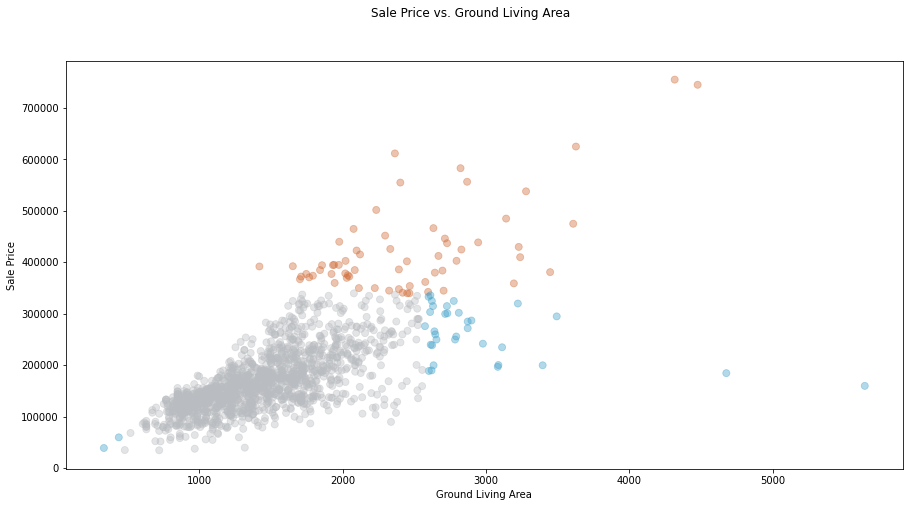

In [68]:
#Identifyind Outliers on scatter plot

# Create new columns, filled with 0s
train['isOutlierSP'] = 0 
train['isOutlierGR'] = 0

# Calculate the mean and standard deviations
meanSP = train['SalePrice'].mean()
stdDevSP = train['SalePrice'].std()
meanGR = train['GrLivArea'].mean()
stdDevGR = train['GrLivArea'].std()

#Identify rows with outliers data on new column

train.loc[abs(train['SalePrice'] - meanSP) > 2 * stdDevSP,'isOutlierSP'] = 1
train.loc[abs(train['GrLivArea'] - meanGR) > 2 * stdDevGR,'isOutlierGR'] = 1

# Create empty list to define colors that will show the difference between both variables and outliers
colorColumn = []
for i in range(len(train)):
    if train["isOutlierSP"][i] == 1:
        colorColumn.append("#D06B36ff") # orange color
    elif train["isOutlierGR"][i] == 1:
        colorColumn.append("#40A0C977") # a blueish color
    else:
        colorColumn.append("#B9BCC077") # gray
        
plt.figure(figsize=(15, 7.5))
plt.xlabel('Ground Living Area')
plt.suptitle('Sale Price vs. Ground Living Area')
plt.ylabel('Sale Price')
plt.scatter(train.GrLivArea, train.SalePrice , c = colorColumn, s = 50, linewidth= 0.8,alpha= 0.4,)



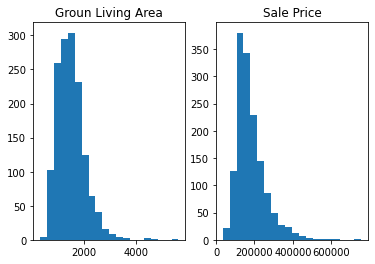

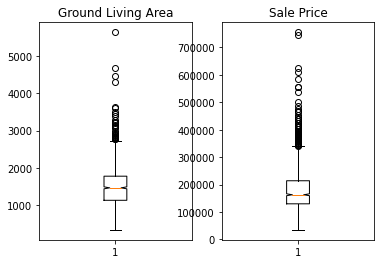

In [46]:
#Distribution plots for both variables

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(train['GrLivArea'], 20)
ax1.set_title('Ground Living Area')
ax2.hist(train['SalePrice'], 20)
ax2.set_title('Sale Price')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(train['GrLivArea'], 20)
ax1.set_title('Ground Living Area')
ax2.boxplot(train['SalePrice'], 20)
ax2.set_title('Sale Price')
plt.show()

In [84]:
#Linear Regression Model

SPregr = linear_model.LinearRegression()
SPregr.fit(train[['GrLivArea']],train[['SalePrice']])

LinearRegression()

In [85]:
#Regression Coefficient(Beta)

print(SPregr.coef_)

[[107.13035897]]


In [86]:
#Coefficient of determination(R2)

SPregr.score(train[['GrLivArea']],train[['SalePrice']])

0.5021486502718042

### Simple Linear Regression

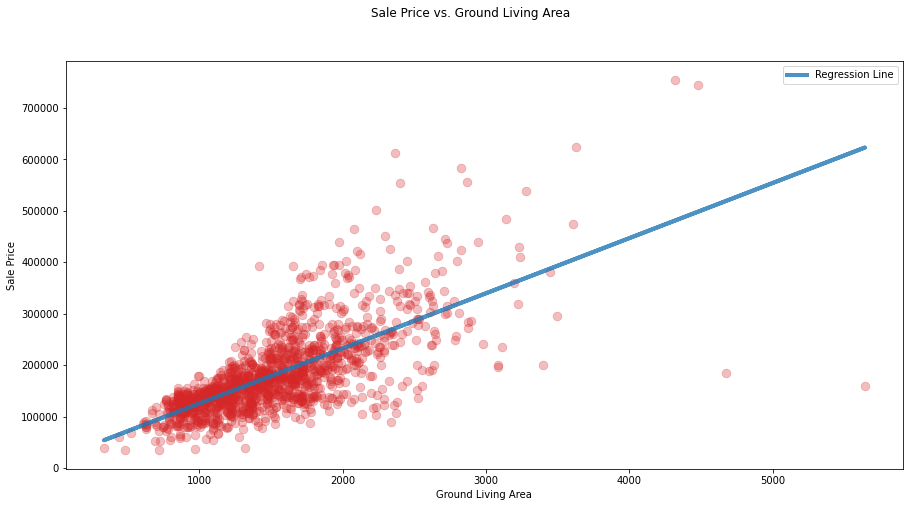

In [190]:
#New label column
train['predSP']=SPregr.predict(train[['GrLivArea']])
plt.figure(figsize=(15, 7.5))

plt.scatter(train.GrLivArea, train.SalePrice ,c= '#d62728', s = 75, linewidth= 0.75,alpha= 0.3,)

#In blue the predicted values
plt.plot(train.GrLivArea, train.predSP,linewidth= 4,alpha= 0.8,label='Regression Line')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.suptitle('Sale Price vs. Ground Living Area')
plt.legend()


count    1.460000e+03
mean     1.085413e-11
std      5.605350e+04
min     -4.629985e+05
25%     -2.980000e+04
50%     -1.123619e+03
75%      2.195731e+04
max      3.398318e+05
Name: Residuals, dtype: float64


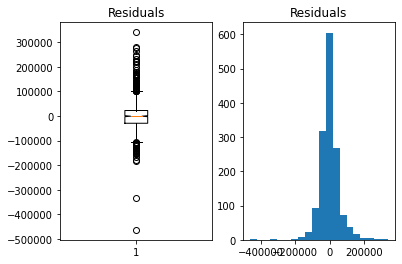

In [106]:
#Adding a new column to analyse the residuals

train['Residuals']= train['SalePrice']-train['predSP']
print(train['Residuals'].describe())

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(train['Residuals'], 20)
ax1.set_title('Residuals')
ax2.hist(train['Residuals'], 20)
ax2.set_title('Residuals')
plt.show()

### Multiple Linear Regression

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



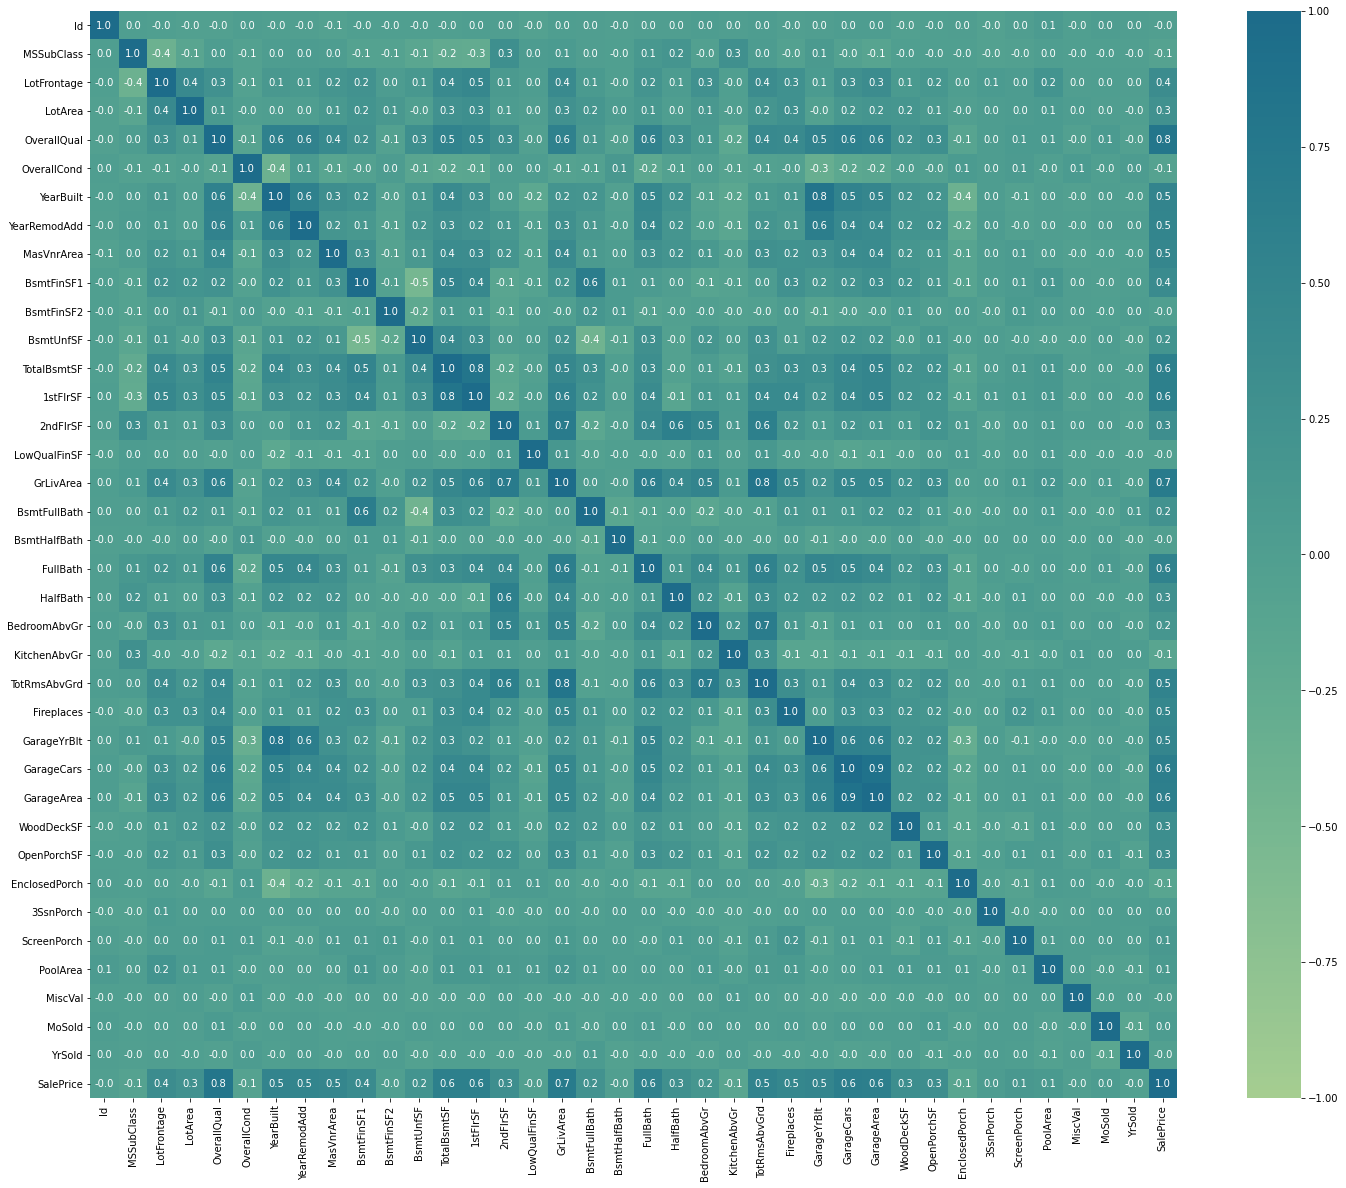

In [40]:
#Top 10 most correlated features

numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')

plt.figure(figsize = (25,20))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0.5, cmap='crest'
    ,square=True, annot=True, fmt=".1f")

In [110]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['GrLivArea'].sort_values(ascending=False)[:15], '\n')

predSP          1.000000
GrLivArea       1.000000
TotRmsAbvGrd    0.825489
SalePrice       0.708624
2ndFlrSF        0.687501
FullBath        0.630012
OverallQual     0.593007
1stFlrSF        0.566024
isOutlierGR     0.546048
BedroomAbvGr    0.521270
GarageArea      0.468997
GarageCars      0.467247
Fireplaces      0.461679
TotalBsmtSF     0.454868
HalfBath        0.415772
Name: GrLivArea, dtype: float64 



In [111]:
#Choose two predictors: GrLivArea and Garage Area and store in new subset

train1 = train [['GrLivArea','GarageArea']]

In [112]:
#Linear Regression Model

MSPregr = linear_model.LinearRegression()
MSPregr.fit(train1,train[['SalePrice']])

LinearRegression()

In [115]:
#Coefficient of determination(R2)

MSPregr.score(train1,train[['SalePrice']])

0.6107742041987958

In [116]:
#Analysis of parameters

print('Intercept: \n', MSPregr.intercept_)
print('Coefficients: \n', MSPregr.coef_)

Intercept: 
 [-6915.38067356]
Coefficients: 
 [[ 80.67131781 138.65724537]]


## Exercise 2: Linear regression to analyse relationships between crimes and socioeconomic characteristics

In [125]:
#Import database

census = pd.read_csv('censusCrimeClean.csv')

In [126]:
print(census.head())

         communityname  fold  population  householdsize  racepctblack  \
0         Lakewoodcity     1        0.19           0.33          0.02   
1          Tukwilacity     1        0.00           0.16          0.12   
2         Aberdeentown     1        0.00           0.42          0.49   
3  Willingborotownship     1        0.04           0.77          1.00   
4    Bethlehemtownship     1        0.01           0.55          0.02   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
0          0.90          0.12         0.17         0.34         0.47  ...   
1          0.74          0.45         0.07         0.26         0.59  ...   
2          0.56          0.17         0.04         0.39         0.47  ...   
3          0.08          0.12         0.10         0.51         0.50  ...   
4          0.95          0.09         0.05         0.38         0.38  ...   

   NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0        0.0     

### Simple Linear Regression

In [148]:
#Choose variables for the linear regression model

model= scipy.stats.linregress(census['medIncome'],census['ViolentCrimesPerPop'])
print('Slope:',model.slope)
print('Intercept:',model.intercept)
print('R-value:',model.rvalue)
print('P-value:',model.pvalue)
print('Standard error:',model.stderr)

Slope: -0.4720854929583652
Intercept: 0.4084600410077531
R-value: -0.42422061672612604
P-value: 6.334424808053117e-88
Standard error: 0.022578802568586777


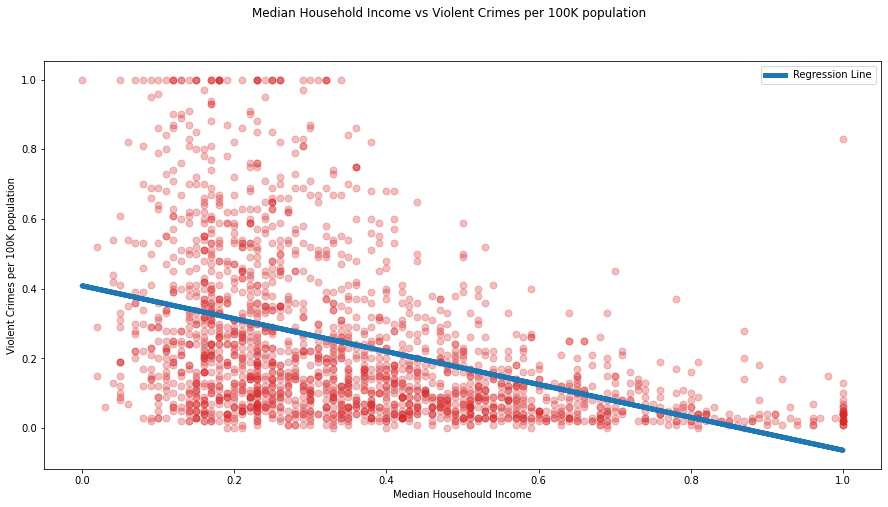

In [180]:
#Plot of the regression line while calculating the regression line with numpy's polyval function

modelledTarget = np.polyval([model.slope, model.intercept], census['medIncome'])
plt.figure(figsize=(15, 7.5))
plt.scatter(census['medIncome'], census['ViolentCrimesPerPop'] ,c= '#d62728', s = 50, linewidth= 0.8,alpha= 0.3,)

#In blue the predicted values
plt.plot(census['medIncome'],modelledTarget, linewidth= 5,label='Regression Line')
plt.xlabel('Median Househould Income')
plt.ylabel('Violent Crimes per 100K population')
plt.suptitle('Median Household Income vs Violent Crimes per 100K population')
plt.legend()

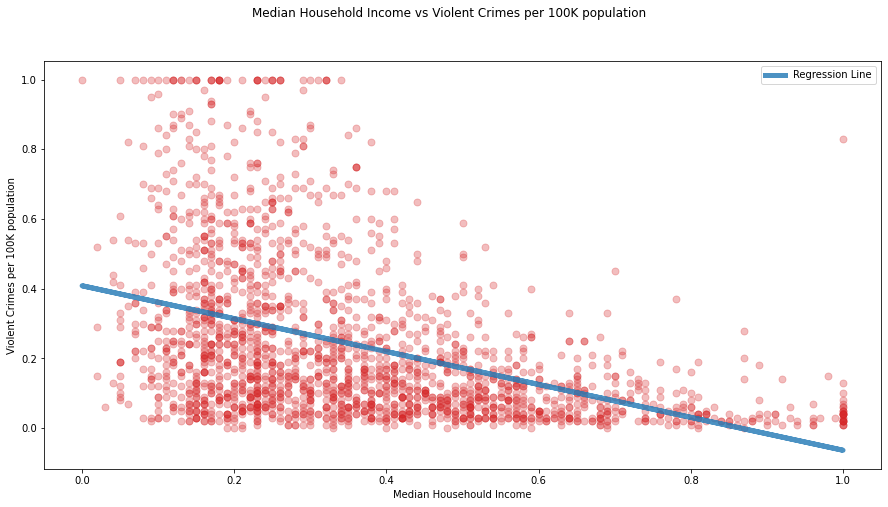

In [179]:
#Plot of the regression line while considering result parameters of the model

plt.figure(figsize=(15, 7.5))
plt.scatter(census['medIncome'], census['ViolentCrimesPerPop'] ,c= '#d62728', s = 50, linewidth= 0.8,alpha= 0.3)

#In blue the predicted values
plt.plot(census['medIncome'],model.slope*census['medIncome']+model.intercept, linewidth= 5,alpha= 0.8,label='Regression Line')
plt.xlabel('Median Househould Income')
plt.ylabel('Violent Crimes per 100K population')
plt.suptitle('Median Household Income vs Violent Crimes per 100K population')
plt.legend()

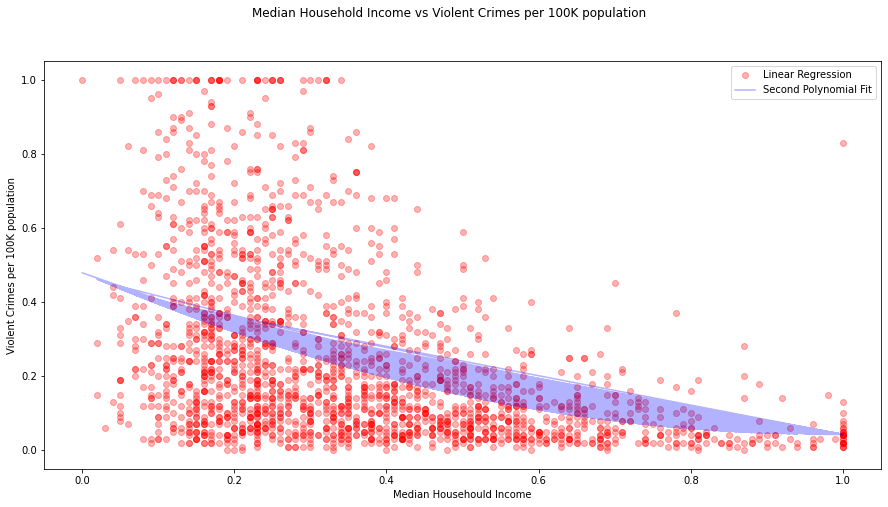

In [178]:
plt.figure(figsize=(15, 7.5))
plt.plot(census['medIncome'],census['ViolentCrimesPerPop'],'ro',label='Linear Regression', alpha=0.3)
pCoeff= np.polyfit(census['medIncome'],census['ViolentCrimesPerPop'],2)
plt.plot(census['medIncome'],np.polyval(pCoeff, census['medIncome']),color='blue',label='Second Polynomial Fit',alpha=0.3)
plt.xlabel('Median Househould Income')
plt.suptitle('Median Household Income vs Violent Crimes per 100K population')

plt.ylabel('Violent Crimes per 100K population')
plt.legend()
plt.show()

## Multiple Linear Regression

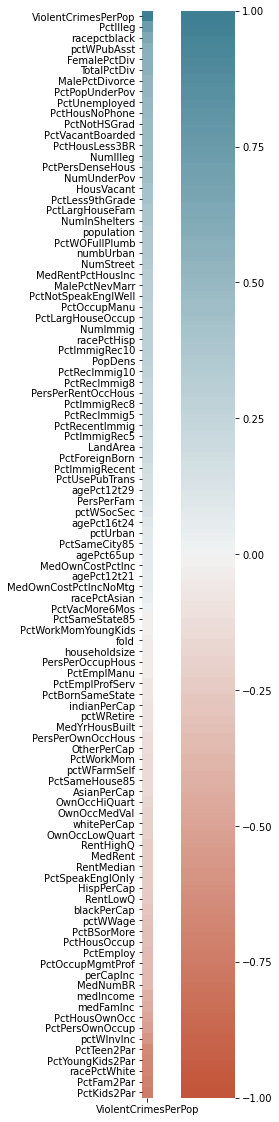

In [193]:
corr = census.corr()
corr_crimes=corr[['ViolentCrimesPerPop']]

#sort by the amount of correlation
corr_crimes=corr_crimes.sort_values(by ='ViolentCrimesPerPop',ascending=False)

plt.figure(figsize = (10,20))
ax = sns.heatmap(
    corr_crimes, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [199]:
X = census[['medIncome','PctUnemployed']]
y = census['ViolentCrimesPerPop']
X = sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.270
Model:                             OLS   Adj. R-squared:                  0.269
Method:                  Least Squares   F-statistic:                     368.4
Date:                 Tue, 08 Nov 2022   Prob (F-statistic):          7.36e-137
Time:                         21:44:57   Log-Likelihood:                 389.89
No. Observations:                 1994   AIC:                            -773.8
Df Residuals:                     1991   BIC:                            -757.0
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1389      0.019      7.174      0.000       0.101       0.177
medIncome        -0.1849      0.028     -6.579      0.000      -0.240      -0.130
PctUnemployed     0.4563      0.029     15.682      0.000       0.399       0.513
==============================================================================
Omnibus:                      396.027   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.457
Skew:                           1.191   Prob(JB):                    4.49e-166
Kurtosis:                       4.868   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 3: Logistic Regression to analyse Titanic survival

In [201]:
#import database

titanic= pd.read_csv('titanicDataFull.csv')
print(titanic.head())
print(titanic.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [202]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [203]:
titanic.drop('Age',axis=1,inplace=True)
titanic.drop('Embarked',axis=1,inplace=True)
titanic.drop('Cabin',axis=1,inplace=True)

In [204]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [209]:
titanic_clean=pd.get_dummies(titanic, columns=["Pclass","Sex"])

In [210]:
titanic_clean.drop('Sex_female', axis=1, inplace=True)
titanic_clean.drop('PassengerId', axis=1, inplace=True)
titanic_clean.drop('Name', axis=1, inplace=True)
titanic_clean.drop('Ticket', axis=1, inplace=True)
titanic_clean.drop('Parch',axis=1,inplace=True)

In [211]:
print(titanic_clean.head())

   Survived  SibSp     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_male
0         0      1   7.2500         0         0         1         1
1         1      1  71.2833         1         0         0         0
2         1      0   7.9250         0         0         1         0
3         1      1  53.1000         1         0         0         0
4         0      0   8.0500         0         0         1         1
